# Daily Weather Humidity

Sensor measurements from the weather station were captured at one-minute intervals. These measurements were then processed to generate values to describe daily weather. Since this dataset was created to classify low-humidity days vs. non-low-humidity days (that is, days with normal or high humidity), the variables included are weather measurements in the morning, with one measurement, namely relatively humidity, in the afternoon. The idea is to use the morning weather values to predict whether the day will be low-humidity or not based on the afternoon measurement of relative humidity.

Each row, or sample, consists of the following variables:

number: unique number for each row

- airpressure9am: air pressure averaged over a period from 8:55am to 9:04am (Unit: hectopascals)

- airtemp9am: air temperature averaged over a period from 8:55am to 9:04am (Unit: degrees Fahrenheit)

- airwinddirection_9am: wind direction averaged over a period from 8:55am to 9:04am (Unit: degrees,
with 0 means coming from the North, and increasing clockwise)

- airwindspeed9am: wind speed averaged over a period from 8:55am to 9:04am (Unit: miles per hour) 

- maxwinddirection9am: wind gust direction averaged over a period from 8:55am to 9:10am (Unit:
degrees, with 0 being North and increasing clockwise)

- maxwindspeed_9am: wind gust speed averaged over a period from 8:55am to 9:04am (Unit: miles per
hour)

- rainaccumulation9am: amount of rain accumulated in the 24 hours prior to 9am (Unit: millimeters)

- rainduration9am: amount of time rain was recorded in the 24 hours prior to 9am (Unit: seconds)

- relativehumidity9am: relative humidity averaged over a period from 8:55am to 9:04am (Unit: percent)

- relativehumidity3pm: relative humidity averaged over a period from 2:55pm to 3:04pm (Unit: percent )

What we will do here is , we define a own target column

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("daily_weather.csv")

In [3]:
df.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [4]:
df.tail()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
1090,1090,918.90,63.104,192.9,3.869906,207.3,5.212070,0.0,0.0,26.02,38.18
1091,1091,918.71,49.568,241.6,1.811921,227.4,2.371156,0.0,0.0,90.35,73.34
1092,1092,916.60,71.096,189.3,3.064608,200.8,3.892276,0.0,0.0,45.59,52.31
1093,1093,912.60,58.406,172.7,3.825167,189.1,4.764682,0.0,0.0,64.84,58.28
1094,1094,921.53,77.702,97.1,3.265932,125.9,4.451511,0.0,0.0,14.56,15.10


In [5]:
df.shape

(1095, 11)

In [6]:
df.isna().sum()

number                    0
air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

# Data Cleaning

In [7]:
#removing number column because there is no use of that.#
#We do not need to number the rows as Pandas provides its's own indexing 
del df['number']

In [8]:
#drroping rows where we have null values 
df = df.dropna()

In [9]:
#calculate how many rows deleted which contain null values
df.shape

(1064, 10)

In [10]:
df.isna().sum()

air_pressure_9am          0
air_temp_9am              0
avg_wind_direction_9am    0
avg_wind_speed_9am        0
max_wind_direction_9am    0
max_wind_speed_9am        0
rain_accumulation_9am     0
rain_duration_9am         0
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

In [11]:
#correlation
corrmat = df.corr()

In [12]:
corrmat

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
air_pressure_9am,1.000000,-0.057329,-0.313360,0.235826,-0.287280,0.252479,-0.085434,-0.100485,-0.431126,-0.480117
air_temp_9am,-0.057329,1.000000,-0.015069,-0.284327,-0.079520,-0.282483,-0.199102,-0.259103,-0.582318,-0.491068
avg_wind_direction_9am,-0.313360,-0.015069,1.000000,-0.441441,0.868837,-0.460122,0.117634,0.127367,0.346865,0.384885
avg_wind_speed_9am,0.235826,-0.284327,-0.441441,1.000000,-0.364338,0.995412,0.002322,0.012057,-0.095472,-0.154422
max_wind_direction_9am,-0.287280,-0.079520,0.868837,-0.364338,1.000000,-0.383025,0.091003,0.082574,0.369500,0.405946
max_wind_speed_9am,0.252479,-0.282483,-0.460122,0.995412,-0.383025,1.000000,-0.000334,0.011890,-0.108673,-0.173720
rain_accumulation_9am,-0.085434,-0.199102,0.117634,0.002322,0.091003,-0.000334,1.000000,0.735737,0.228951,0.181887
rain_duration_9am,-0.100485,-0.259103,0.127367,0.012057,0.082574,0.011890,0.735737,1.000000,0.304828,0.263283
relative_humidity_9am,-0.431126,-0.582318,0.346865,-0.095472,0.369500,-0.108673,0.228951,0.304828,1.000000,0.881301
relative_humidity_3pm,-0.480117,-0.491068,0.384885,-0.154422,0.405946,-0.173720,0.181887,0.263283,0.881301,1.000000


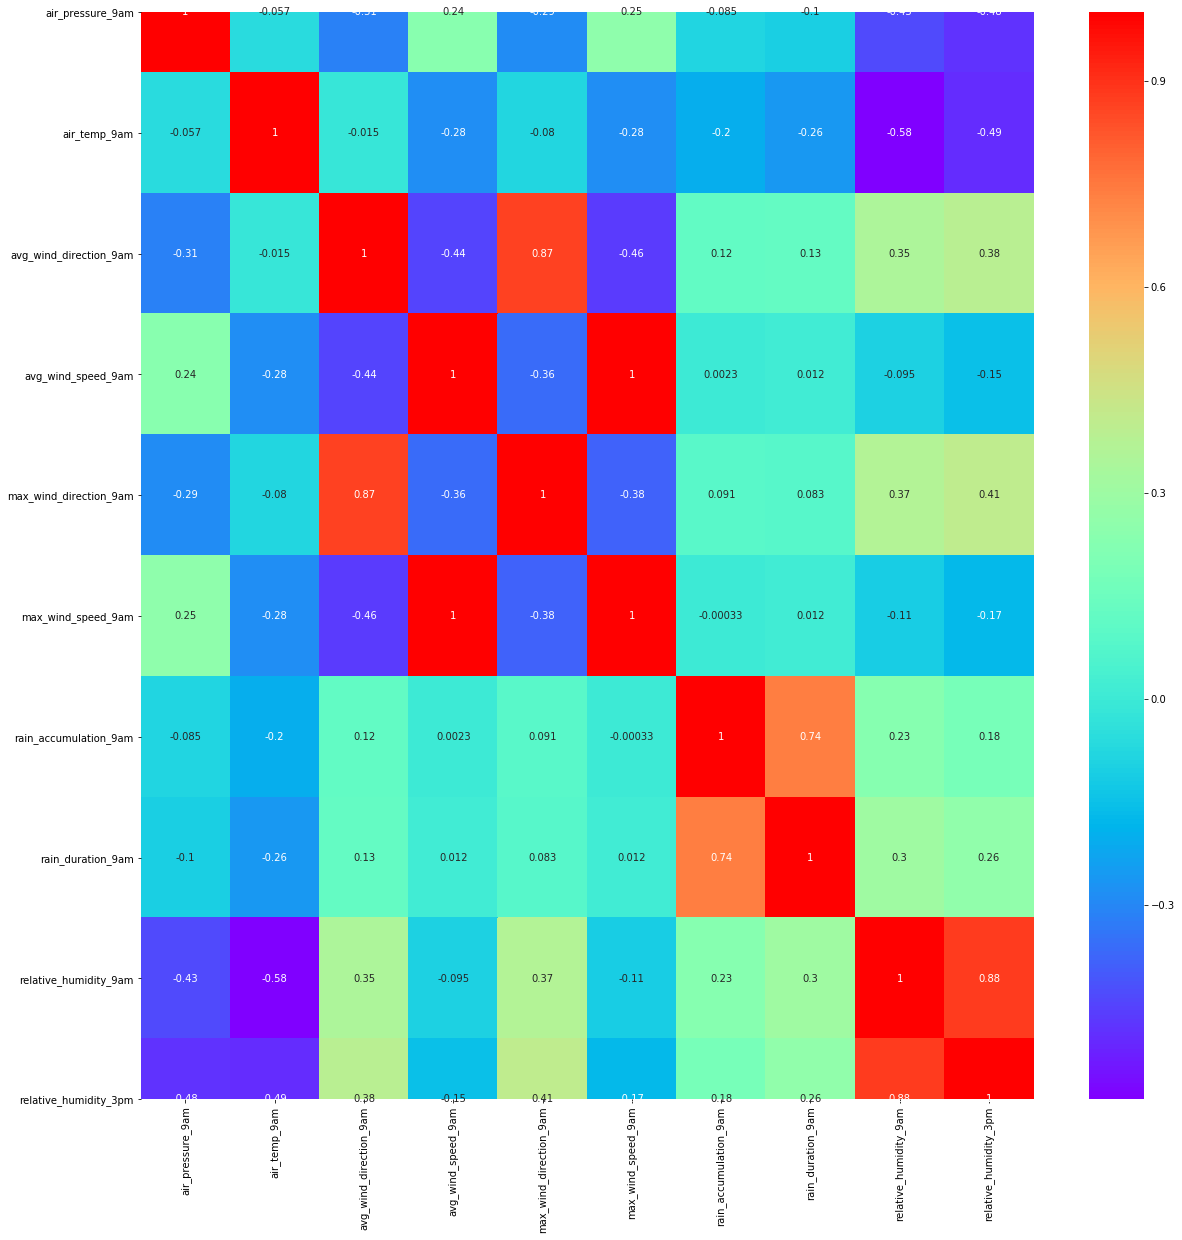

In [13]:
corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(df[corr_features].corr(),annot = True,cmap = 'rainbow')

In [14]:
# creating a copy of data for cleaning purpose
clean_data = df.copy()

### Lets' create a additional column for high humidity

### Convert to a Classification task
- Binarize the relative humidity_3pm to 0 or 1

We are assigning the values 0 or 1 and adding a new column 'high humidity label'. We are basically classifying the data into two categories ( binary problem) by setting a desired value ( 27 , in this case ) to be the threshold and anything above is high ( 1 ) and anything below is low ( 0 ).

In [15]:
# defining a high humidity as "relative_humidity>28" at 3pm
clean_data ['high_humidity_label'] =(clean_data['relative_humidity_3pm'] >27)*1


above ihave created new_feature one of the exisiting feature

In [16]:
clean_data ['high_humidity_label'].head()

0    1
1    0
2    0
3    0
4    1
Name: high_humidity_label, dtype: int64

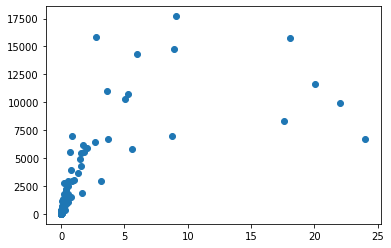

In [17]:
#A scatter chart shows the relationship between two different variables 

plt.scatter(df['rain_accumulation_9am'], df[ 'rain_duration_9am']) 
plt.show() 
  

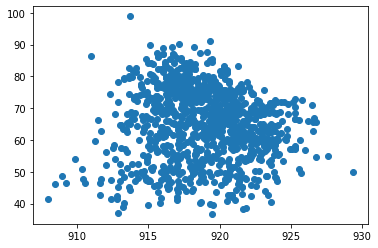

In [18]:
plt.scatter(df['air_pressure_9am'], df[ 'air_temp_9am']) 
plt.show() 

### Target is now stored as y. Here, target is the label - 'high_humidity_label

In [19]:
y = clean_data[['high_humidity_label']].copy()
y

,high_humidity_label
0,1
1,0
2,0
3,0
4,1
...,...
1090,1
1091,1
1092,1
1093,1


In [20]:
clean_data.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm,high_humidity_label
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000,1
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000,1


In [21]:
# creating a list of all independent features apart from relativehumidity at 3pm
features = ['air_pressure_9am',
 'air_temp_9am',
 'avg_wind_direction_9am',
 'avg_wind_speed_9am',
 'max_wind_direction_9am',
 'max_wind_speed_9am',
 'rain_accumulation_9am',
 'rain_duration_9am',
 'relative_humidity_9am']

In [ ]:
# Make the data of these features as X
X = clean_data[features].copy()
X.columns

In [ ]:
#target
y.columns

### Perform the test and Train split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 324)

### Fit the model on the training set

We will build a model using the Decision Tree Classifier using the fit functions

In [ ]:
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes = 10, random_state = 0, criterion = 'gini', max_depth = None, min_samples_leaf = 1)
humidity_classifier.fit(X_train, y_train)

In [ ]:
#predicting values on test set
predictions = humidity_classifier.predict(X_test)
type(predictions)

In [ ]:
predictions[:10]

In [ ]:
#Measure the accuracy of the data
accuracy_score(y_test, y_pred = predictions)

In [ ]:
#Measuring the mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred = predictions)

We have predictd the humidity at 3PM based on the 9AM measurements with an 88% accuracy and 11% loss which are very good stats.

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, humidity_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, humidity_classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Treee(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))